In [1]:
import sys
import itertools
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

sys.path.append("..")
import helper.helper as h

In [2]:
def generate_A(n, num_edges):
    edges = np.array([0.0] * (int(n * (n + 1) / 2) - num_edges) + [1.0] * num_edges)
    
    edges[edges > 0] = (2 * np.random.randint(0, 2, size=(num_edges)) - 1) * np.random.uniform(0.5, 0.75, num_edges)
    np.random.shuffle(edges)
    
    A = np.zeros((n, n))
    A[np.tril_indices(n)] = edges
    
    return A

A:
[[ 0.    0.    0.  ]
 [-0.53  0.51  0.  ]
 [ 0.71  0.    0.  ]]

P:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]].

W:
[[ 0.    0.    0.  ]
 [-0.53  0.51  0.  ]
 [ 0.71  0.    0.  ]]


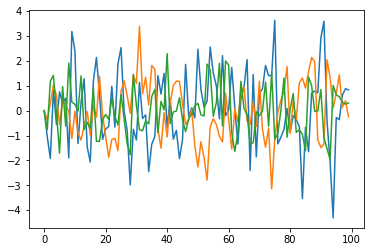

In [16]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
T, n, s = 100, 3, 3

## Coefficient matrix
A_true = generate_A(n, s)

## True permutation
P_true = np.random.permutation(np.identity(n))

## Generate series
X = h.generate_var_2(T, n, A_true, P_true)
plt.plot(X);

## Only print matrices when n <= 10
if n <= 10:
    print(f"A:\n{np.round(A_true, 2)}\n\nP:\n{P_true}.\n\nW:\n{np.round(P_true.T @ A_true @ P_true, 2)}")


[[ 0.    0.53 -0.37]
 [ 0.    0.54  0.38]
 [ 0.    0.    0.  ]]


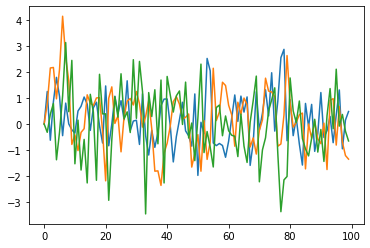

In [79]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
n, s, T = 3, 4, 100

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
W_true = h.generate_A(n, s, tril = False, low = 0.30, high = 0.70)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(W_true)):
    W_true[i][i] = np.abs(W_true[i][i])

W_true = W_true.T

P_true = np.identity(n)

X = h.generate_var_2(T, n, W_true, np.identity(n))
plt.plot(X);

print(np.round(W_true, 2))

In [5]:
import statsmodels.api as sm

def ols_W(X, P, LT = False):
    # translate X
    x = X @ P.T
    
    # get regressor and varibles
    y = x[1:]
    x = x[:-1]

    W_hat = np.array(np.zeros(n)).T

    # get parameters
    for i in range(n):
        est = sm.OLS(y[:, i], x[:, i:]).fit() 
        print(est.params)
        W_hat = np.vstack((W_hat, np.append(np.zeros(i), est.params).T))
    
    if LT:
        return W_hat[1:].T
    
    return P.T @ W_hat[1:].T @ P

ols_W(X, P_true)

[-0.01220298 -0.00191848 -0.03768472  0.08057547 -0.16983732  0.06189468
  0.02565787  0.08137604  0.08003758  0.04332919]
[ 0.21484285 -0.02495336 -0.12249363  0.11375494  0.03722133  0.0169076
  0.08536993 -0.15899487 -0.04187986]
[-0.18875011 -0.11552359 -0.0042238  -0.04114699  0.08948059  0.09505265
  0.00209966 -0.00209009]
[ 0.01164966  0.17118366 -0.08676482 -0.07134218 -0.20022676 -0.18702668
  0.02806832]
[ 0.24867881  0.07969253  0.06190977  0.03480335 -0.06108775 -0.04903584]
[ 0.56632535  0.01880205  0.13509853 -0.07228038  0.06651001]
[ 0.60999433 -0.16662749 -0.09435298  0.32513482]
[ 0.62714902 -0.06819309 -0.31063561]
[ 0.25348173 -0.01699567]
[0.40342308]


array([[-0.01220298,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.00191848,  0.21484285,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.03768472, -0.02495336, -0.18875011,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.08057547, -0.12249363, -0.11552359,  0.01164966,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.16983732,  0.11375494, -0.0042238 ,  0.17118366,  0.24867881,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.06189468,  0.03722133, -0.04114699, -0.08676482,  0.07969253,
         0.56632535,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.02565787,  0.0169076 ,  0.08948059, -0.07134218,  0.06190977,
         0.01880205,  0.60999433,  0.        

In [66]:
for P in Ps:
    P = np.flip(P)
    print(np.allclose(W_true[:, P][P, :], np.triu(W_true[:, P][P, :])))

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [9]:
import statsmodels.api as sm

def ols_W2(X, P, LT = False):
    # translate X
    x = X @ P.T

    W_hat = np.zeros((n, n))

    # get parameters
    for i in range(n):
        W_hat[i:, i] = np.linalg.inv(x[:-1, i:].T @ x[:-1, i:]) @ x[:-1, i:].T @ x[1:, i]      
        # W_hat[i:, i] = sm.OLS(x[1:, i], x[:-1, i:]).fit().params
    
    return P.T @ W_hat @ P

W = ols_W2(X, P_true)
loss(W)

19.033570031088708

In [10]:
def ols_W3(X, P, LT = False):
    # translate X
    x = X[:, P]

    W_hat = np.zeros((n, n))

    # get parameters
    for i in range(n):
        W_hat[i:, i] = np.linalg.inv(x[:-1, i:].T @ x[:-1, i:]) @ x[:-1, i:].T @ x[1:, i]      
        # W_hat[i:, i] = sm.OLS(x[1:, i], x[:-1, i:]).fit().params
    
    return W_hat[:, P][P, :]

W = ols_W3(X, range(n))
loss(W)

19.033570031088708

In [11]:
Ps = np.load("Ps_Ex.npy")

W = selected_search(X, Ps)
print(loss(W))

print(np.round(W, 2))

NameError: name 'selected_search' is not defined

In [12]:
def selected_search(X, Ps):
    _, n = np.shape(X)
    W_best = np.identity(n)
    MSE_best = np.inf
    
    for perm in tqdm(Ps, total=np.shape(Ps)[0]):
        W = ols_W3(X, np.flip(perm))
        MSE_W = loss(W)
        
        if MSE_W < MSE_best:
            MSE_best = MSE_W
            print("New best:", MSE_best)
            W_best = W
            
    return W_best

In [180]:
def exhaustive_search(X):
    _, n = np.shape(X)
    W_best = np.identity(n)
    MSE_best = np.inf
    
    for perm in tqdm(itertools.permutations(np.identity(n)), total=np.math.factorial(n)):
        W = ols_W2(X, np.array(perm))
        MSE_W = loss(W)
        
        if MSE_W < MSE_best:
            MSE_best = MSE_W
            W_best = W
            
    return W_best

W_E = exhaustive_search(X)
print(np.round(W_E, 1))

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1999.35it/s]

[[ 0.1  0.5 -0.4]
 [ 0.   0.5  0.5]
 [ 0.   0.  -0. ]]


In [43]:
import statsmodels.api as sm

def ols_W2(X, P, LT = False):
    # translate X
    x = X @ P.T

    W_hat = np.zeros((n, n))

    # get parameters
    for i in range(n):
        W_hat[i:, i] = np.linalg.inv(x[:-1, i:].T @ x[:-1, i:]) @ x[:-1, i:].T @ x[1:, i]      
        # W_hat[i:, i] = sm.OLS(x[1:, i], x[:-1, i:]).fit().params
    
    return P.T @ W_hat @ P

W = ols_W2(X, P_true)
print(W)
loss(W)

[[ 0.07905784  0.          0.        ]
 [-0.49137497  0.45856627  0.        ]
 [ 0.71475775 -0.06274278  0.0489299 ]]


3.3251499733121785

In [8]:
def loss(W):
    M = X @ W
    
    # Remove X[0] and XW[last]
    R = X[1:] - M[:-1]
    
    # Frobenius norm squared loss
    loss = 1 / X[1:].shape[0] * (R ** 2).sum()
    
    return loss

In [170]:
import statsmodels.api as sm

def ols_W4(Psi, K, P):
    W_hat = np.zeros((n, n))

    # get parameters
    for i, p in enumerate(P):        
        W_hat[P[i:], p] = np.linalg.inv(Psi[P[i:, None], P[None, i:]]) @ K[P[i:], p]
    
    return W_hat

W = ols_W4(Psi, K, np.array(range(n)))
print(W)
loss(W)

[[ 0.10357226  0.          0.        ]
 [ 0.00571044  0.50587852  0.        ]
 [-0.06413438 -0.00986268  0.00671242]]


3.711089461704511

In [176]:
def exhaustive_search_K(X):
    
    # initialization
    Psi = X[:-1].T.dot(X[:-1])
    K = X[:-1].T.dot(X[1:])
    
    # initialization
    _, n = np.shape(X)
    W_best = np.identity(n)
    MSE_best = np.inf
    
    # iterate over all permutations
    for perm in tqdm(itertools.permutations(range(n)), total=np.math.factorial(n)):
        
        # get OLS optimal under permutation
        W = ols_W4(Psi, K, np.array(perm))
        
        # get its loss
        MSE_W = loss(W)
        
        # remember best one
        if MSE_W < MSE_best:
            
            MSE_best = MSE_W
            W_best = W
            
    return W_best

W_K = exhaustive_search_K(X)
print(np.round(W_K, 10))

print(loss(W_K))
print(loss(W_E))

100%|██████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 1500.56it/s]

[[ 0.11469128  0.49853209 -0.41089102]
 [ 0.          0.54222993  0.45494952]
 [ 0.          0.         -0.03337261]]
3.0119327350727225
3.0119327350727225


In [150]:
timeit.timeit('ols_W2(X, np.random.permutation(np.identity(n)))', number = 1000, globals = globals())

0.3818931000000134

In [163]:
import timeit
Psi = X[:-1].T.dot(X[:-1])
K = X[:-1].T.dot(X[1:])
timeit.timeit('ols_W4(Psi, K, np.array(range(n)))', number = 10000, globals = globals())

3.84503490000003

In [172]:
def random_search_K(X, max_checks):
    
    # initialization
    Psi = X[:-1].T.dot(X[:-1])
    K = X[:-1].T.dot(X[1:])
    
    n = np.shape(Psi)[0]
    W_best = np.identity(n)
    MSE_best = np.inf
    p_best = np.array(range(n))
    
    # iterate over all permutations
    for _ in tqdm(range(max_checks)):
        
        # get OLS optimal under permutation
        W = ols_W4(Psi, K, np.random.permutation(p_best))
        
        # get its loss
        MSE_W = loss(W)
        
        # remember best one
        if MSE_W < MSE_best:
            
            MSE_best = MSE_W
            W_best = W
            
    return W_best

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1876.17it/s]

[[ 0.11469128  0.49853209 -0.41089102]
 [ 0.          0.54222993  0.45494952]
 [ 0.          0.         -0.03337261]]
3.0119327350727225
3.0119327350727225


[[ 0.    0.    0.    0.   -0.42  0.59 -0.56  0.56]
 [ 0.    0.62 -0.43  0.   -0.56  0.    0.34  0.  ]
 [ 0.    0.    0.   -0.3  -0.6   0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.   -0.65  0.49]
 [ 0.    0.    0.    0.    0.6   0.59  0.69  0.  ]
 [ 0.    0.    0.    0.    0.    0.68  0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.  ]]


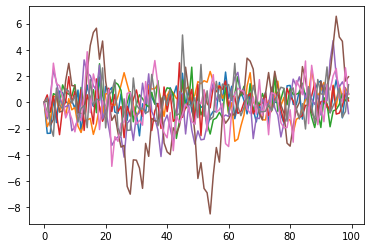

In [186]:
np.random.seed(seed = 12345)

## Number of dimensions, number of edges, number of samples
n, s, T = 8, 16, 100

### Coefficient matrix
## First approach: A is a DAG, no model mismatch
W_true = h.generate_A(n, s, tril = False, low = 0.30, high = 0.70)

# set coefficients to be positive (else oscillating which does not make sense)
for i in range(len(W_true)):
    W_true[i][i] = np.abs(W_true[i][i])

W_true = W_true.T

P_true = np.identity(n)

X = h.generate_var_2(T, n, W_true, np.identity(n))
plt.plot(X);

print(np.round(W_true, 2))

In [187]:
W_R = random_search_K(X, 1000)
W_K = exhaustive_search_K(X)
W_E = exhaustive_search(X)

print(round(loss(W_R), 3))
print(round(loss(W_K), 3))
print(round(loss(W_E), 3))

100%|███████████████████████████████████████████████████████████████████████████| 40320/40320 [01:07<00:00, 598.39it/s]

7.491
7.456
7.456
